Santiago Julio Dávila - 1000413445

## Campo eléctrico 
1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio 
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array. 

## Movimiento parabólico.
2. Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta. 

Elabore un programa en el que dada una distancia, velocidad inicial y  ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón. 

Se recomienda emplear numpy array. 



## Solución punto 1.

Las fórmulas utilizadas para calcular el campo eléctrico del dipolo son:

$$\vec{E_+}=\dfrac{kq}{r^2_+}\hat{r}_+$$

$$\vec{E_-}=-\dfrac{kq}{r^2_-}\hat{r}_-$$

Donde $\vec{E_+}$ y $\vec{E_-}$ son los campos eléctricos producidos por las cargas positiva y negativa del dipolo.

El campo vectorial generado por el dipolo será entonces la suma vectorial de estos dos campos:

$$\vec{E}=\vec{E_+}+\vec{E_-}$$

El ejercicio está resuelto en el sistema CGS electrostático, en el cual la fuerza se mide en _dinas (dyn)_, la distancia en _centímetros (cm)_ y la carga eléctrica en _statcoulombs (statC)_, que se define como la carga que ejerce una fuerza de 1 dina sobre otra carga igual ubicada a 1 cm de distancia. De esta manera se tiene que:

$$k=\frac{1}{4\pi\epsilon_0}=1~ dyn\cdot cm^2\cdot statC^{-2}$$

Factores de conversión: 

$$1~ dyn=10^{-5}~ N$$
$$1~ cm=10^{-2}~ m$$
$$1~ statC=2997924580~ C\approx 2.998\cdot10^9~ C$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k=1

def E_pos(q,r):
   """
   Determina la magnitud del campo eléctrico generado por la partícula positiva del dipolo.
   """
   global k
   return k*q/r**2

def E_neg(q,r):
   """
   Determina la magnitud del campo eléctrico generado por la partícula negativa del dipolo.
   """
   global k
   return -k*q/r**2

In [3]:
d=float(input(print('Inserte la separación del dipolo (en cm): \n')))  #Solicita al usuario la separación del dipolo.
q=float(input(print('Inserte la carga del dipolo (en statC): \n')))    #Solicita al usuario la carga del dipolo.

Inserte la separación del dipolo (en cm): 



None 10


Inserte la carga del dipolo (en statC): 



None 10


In [4]:
def vector_E(rp,q,d):
    """
    Función campo eléctrico: calcula el campo eléctrico producido por el dipolo en cualquier punto.
    -------------
    rp: numpy array de la posición del punto.
    q: carga del dipolo.
    d: separación del dipolo.
    -------------
    1. La función calcula el vector diferencia entre las posiciones del punto y de cada polo y su magnitud.
    
    2. Posteriormente calcula la magnitud de dicho vector, para normalizarlo y encontrar los vectores unitarios.
    
    3. Se calcula el campo eléctrico producido por cada polo en la dirección respectiva.
    
    4. El resultado de la función es la suma vectorial de los dos campos eléctricos.
    """
    
    
    #1.
    Delta_Rpos=rp-np.array([0.,d/2])  
    Delta_Rneg=rp-np.array([0.,-d/2])  
    
    MagDelta_Rpos=np.sqrt(Delta_Rpos[0]**2+Delta_Rpos[1]**2)
    MagDelta_Rneg=np.sqrt(Delta_Rneg[0]**2+Delta_Rneg[1]**2)
    
    #2.
    u_rpos=Delta_Rpos/MagDelta_Rpos
    u_rneg=Delta_Rneg/MagDelta_Rneg
    
    #3.
    Epos=E_pos(q,MagDelta_Rpos)*u_rpos
    Eneg=E_neg(q,MagDelta_Rneg)*u_rneg
    
    #4.
    E=Epos+Eneg
    
    return E



In [5]:
#Crea los arreglos con los intervalos en x e y donde se calculará el campo eléctrico, con su respectivo paso, en función de d.
x  = np.arange(-2*d, 2*d, (d)/7)
n1 = len(x)
y  = np.arange(-2*d, 2*d, (d)/7)
n2 = len(y)

#Crea un arreglo con cada punto de la cuadrícula definida por los arreglos anteriores.
rp = np.zeros((n1*n2 , 2))
k = 0

for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1  


In [6]:
#Crea un arreglo con el vector campo eléctrico en cada punto.
E=np.zeros((n1*n2,2))

for i in range(0, len(rp)):
    a=np.array(rp[i])
    E[i] = vector_E(a,q,d)


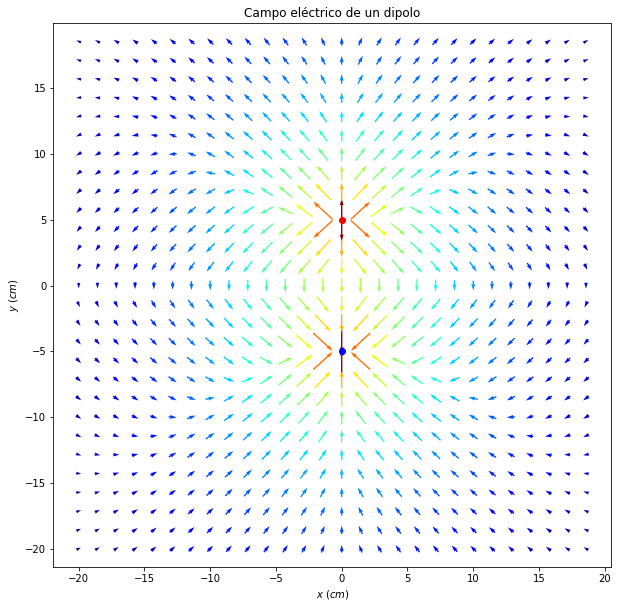

In [7]:
#Crea la gráfica.
fig, ax=plt.subplots(figsize=(10,10))
ax.axis('equal')
ax.plot(0, d/2, "ro" )   #Polo positivo.
ax.plot(0,-d/2,'bo')     #Polo negativo.


def symlog(x):
    """ Retorna el valor ingresado en escala logarítmica (base 10) """
    return np.sign(x) * np.log10(1+np.abs(x))

#Crea el arreglo de colores, en función de la magnitud de E.
color_array = np.sqrt((E[:,0])**2 + (E[:,1])**2)

#Crea el campo vectorial
Q=ax.quiver(rp[:,0], rp[:,1], symlog(E[:,0]), symlog(E[:,1]), symlog(color_array), cmap=plt.get_cmap('jet'), units='width', pivot='mid')
ax.set(xlabel='$x ~(cm)$', ylabel='$y ~(cm)$', title='Campo eléctrico de un dipolo')
plt.show()
fig.savefig('Electric field.png', bbox_inches='tight')

## Solución punto 2.

Este problema se modela mediante un modelo de movimiento parabólico, dado por la ecuación vectorial:

$$\vec{r}(t)=\vec{r_0}+\vec{v_0}t+\frac{1}{2}\vec{g}t^2$$

Equivalente a:

$$\begin{cases}
x(t)=x_0+v_0\cos\theta t \\
y(t)=y_0+v_0\sin\theta t-\dfrac{1}{2}gt^2
\end{cases}$$

Se define la cesta en el origen de coordenadas. La cesta tiene un diámetro de $0.457~m$ y el balón tiene un diámetro de $0.23~m$, con lo cual, para que haya cesta, el centro de masa del balón debe estar entre los puntos $(0.115,~0)~m$ y $(0.342,~0)~m$, modelando el movimiento del balón a partir del movimiento del centro de masa. Si además se asume que un jugador hace el lanzamiento a la altura de su cabeza:

$$y_0=h-3.05~m$$

Donde $h$ es la altura del jugador en metros.

Sea $t_c$ el tiempo que tarda el balón en alcanzar la altura de la cesta, entonces $y(t_c)=0$:

$$t_c=\dfrac{v_0\sin\theta+\sqrt{{v_0}^2\sin^2\theta+2gy_0}}{g}$$

In [186]:
g=9.8
def t_c(v_0,theta,h):
    '''
    Calcula el tiempo en que el balón alcanza la altura de la cesta (cuando está cayendo).
    ------------
    v_0: velocidad de lanzamiento en m/s.
    theta: ángulo de lanzamiento en grados.
    h: estatura del jugador en m.
    '''
    
    global g
    t=(v_0*np.sin(np.radians(theta))+np.sqrt(v_0**2*(np.sin(np.radians(theta)))**2+2*g*(h-3.05)))/g
    
    return t

In [187]:
def x(x_0,v_0,theta,t):
    '''
    Calcula la posición horizontal en función del tiempo, con los parámetros dados.
    -----------
    x_0: distancia a la cesta en m.
    v_0: velocidad de lanzamiento en m/s.
    theta: ángulo de lanzamiento en grados.
    t: tiempo en s.
    '''
    x=x_0-v_0*np.cos(np.radians(theta))*t
    return x

def y(h,v_0,theta,t):
    '''
    Calcula la posición vertical en función del tiempo, con los parámetros dados.
    -----------
    h: estatura del jugador en m.
    v_0: velocidad de lanzamiento en m/s.
    theta: ángulo de lanzamiento en grados.
    t: tiempo en s.
    '''
    global g
    y=h-3.05+v_0*np.sin(np.radians(theta))*t-(g*t**2)/2
    return y

In [190]:
def cesta(dic):
    '''
    Función que determina si el jugador hace cesta o no.
    ------------
    dic: diccionario con los valores de:
        la estatura (h),
        la velocidad de lanzamiento(v_0), 
        ángulo de lanzamiento (theta),
        distancia a la cesta (x_0),
        tiempo de vuelo del balón (t_c).
    
    1. Define dos arreglos con las posiciones horizontal y vertical.
    2. Define un arreglo con los índices de la lista X si X[i] se encuentra entre los valores de x necesarios para que haya cesta.
    3. Evalúa si la posición vertical es la apropiada para que haya cesta.
    
    Si se cumplen las condiciones 2 y 3, se determina que hubo cesta, si no, no hubo cesta.
    '''
    #1.
    Y=np.array([y(dic['h'],dic['v_0'],dic['theta'],T) for T in np.linspace(0,dic['t_c'],100)])
    X=np.array([x(dic['x_0'],dic['v_0'],dic['theta'],T) for T in np.linspace(0,dic['t_c'],100)])
    #2.
    ind=np.array([i[0] for i in enumerate(X) if (X[i[0]] > 0.115) and (X[i[0]] < 0.342)])
    #3.
    if any((Y[i] < 0.115) for i in ind):
        return print('El jugador hizo cesta.')
    else:
        return print('El jugador no hizo cesta.')

In [192]:
#Solicita al usuario los datos requeridos para hacer el cálculo.
h=float(input(print('Ingrese la estatura del jugador (en m):\n')))
v_0=float(input(print('Ingrese la velocidad inicial (en m/s):\n')))
theta=float(input(print('Ingrese el ángulo de lanzamiento (en grados):\n')))
x_0=float(input(print('Ingrese la distancia a la cesta (en m):\n')))

t=t_c(v_0,theta,h)

dic={'h':h, 'v_0':v_0, 'theta':theta, 'x_0':x_0, 't_c':t}

cesta(dic)

Ingrese la estatura del jugador (en m):



None 2


Ingrese la velocidad inicial (en m/s):



None 10.66


Ingrese el ángulo de lanzamiento (en grados):



None 40


Ingrese la distancia a la cesta (en m):



None 10.21725422


El jugador hizo cesta.


AYUDA Construida en clase:

In [2]:
k = 1

def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  global k
  return k*q/r**2

In [3]:
r_source = {"q1": np.array([0., 0])} #Posicion de la fuente
rp       = np.array([1.,1])                # Punto para encontrar el campo electrico


In [ ]:
Delta_x = r_source["q1"][0]- rp[0]
print(Delta_x)
Delta_y = r_source["q1"][1]- rp[1]
print(Delta_y)

-1.0
-1.0


In [ ]:
Delta_R =  rp- r_source["q1"] 

In [ ]:
Delta_R

array([1., 1.])

In [ ]:
MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)

In [ ]:
MagDelta_R

1.4142135623730951

In [ ]:
u_R = Delta_R/MagDelta_R

In [ ]:
u_R

array([0.70710678, 0.70710678])

In [ ]:
E = E_campo(100,MagDelta_R ) * u_R
E

array([35.35533906, 35.35533906])

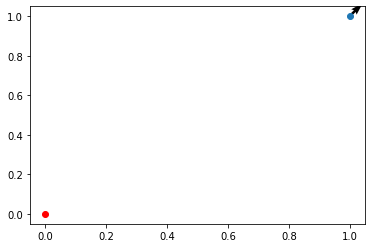

In [ ]:
plt.figure()
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro")
plt.plot(rp[0], rp[1],"o")
plt.quiver(rp[0], rp[1], E[0], E[1])

In [ ]:
def Campo_fuente(rsource, rp) : 
  """
  Parameter
  ---------
  rsource: numpy array de 2D, con la posicion de la fuente
  rp     : numpy array de 2D, El punto donde se encontrará el campo

  Return
  ----------
  Ex: Componente x del campo electrico
  Ey: Componente y del campo electrico 
  """

  Delta_R =  rp - rsource
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  u_R = Delta_R/MagDelta_R
  
  E = E_campo(1,MagDelta_R ) * u_R
  Ex = E[0]
  Ey = E[1]
  return Ex, Ey

In [ ]:
r_source = {"q1": np.array([0., 0])} #Posicion de la fuente
rp       = np.array([1.,1])                # Punto para encontrar el campo electrico


In [ ]:
Campo_fuente(r_source["q1"], rp )

(0.3535533905932737, 0.3535533905932737)

In [ ]:
# Definir los puntos donde se se determinara el campo electrico 

x  = np.arange(-2, 3, 0.5)
n1 = len(x)
y  = np.arange(-2, 3, 0.5)
n2 = len(y)


In [ ]:
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [ ]:
for i, x_ in enumerate(x):
  print(i, x_)

0 -2.0
1 -1.5
2 -1.0
3 -0.5
4 0.0
5 0.5
6 1.0
7 1.5
8 2.0
9 2.5


In [ ]:
rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1  
print(rp[1])

[-2.  -1.5]


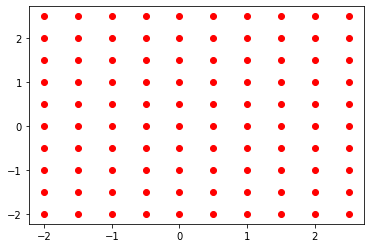

In [ ]:
plt.plot(rp[:,0], rp[:,1],"ro")

In [ ]:
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [ ]:
r_source = {"q1": np.array([0., 1])} #Posicion de la fuente


E = np.zeros((n1*n2, 2))

for i in range(0, len(rp)):
  E[i] = Campo_fuente(r_source["q1"], rp[i] )
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


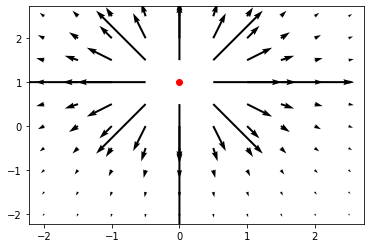

In [ ]:
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro" ) 
plt.quiver(rp[:,0], rp[:,1], E[:,0], E[:,1])

[(-1, (1.0, 0.0)), (1, (-1.0, 1.2246467991473532e-16))]

In [8]:
plt.quiver?

Signature: plt.quiver(*args, data=None, **kw)
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], **kw)

*X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
*C* optionally sets the color.

**Arrow size**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The defaults give a slightly swept-back arrow; to make the head a
triangle, make *headaxislength* the same as *headlength*. To make the
arrow more pointed, reduce *headwidth* or increase *headlength* and
*headaxislength*. To make the head smaller relative to the shaft,
scale down all the head parameters. You will probably do best to leave
minshaft alone.

**Arrow outline**

*linewidths* and *edgecolors* can be used to customize the arrow
outlines.

Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates of the arrow locations.

  